/tmp/ipython-input-255/473784933.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  HYP_CMAP = get_cmap(HYP_CM)


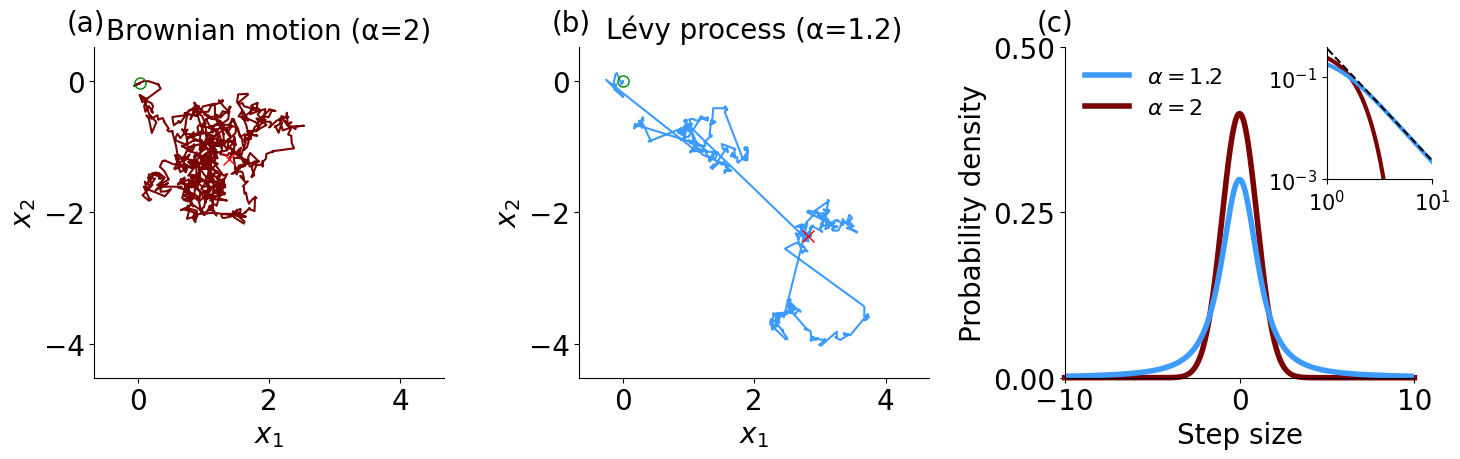

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
from os.path import isdir, isfile, join
from os import makedirs
from scipy.stats import levy_stable

from matplotlib.cm import get_cmap
from matplotlib.transforms import ScaledTranslation
from string import ascii_lowercase

display = False
BIGGER_SIZE = 20
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
MARKERSIZE = 8
LWIDTH = 4

alpha = 1.2
# color scheme 1
c_bm = '#416FB2'
c_levy = '#DF8544'

# color scheme 2
HYP_CM = 'turbo'
HYP_CMAP = get_cmap(HYP_CM)
HYP_CNORM = mpl.colors.Normalize(vmin=1, vmax=2)
c_bm = HYP_CMAP(HYP_CNORM(2))
c_levy = HYP_CMAP(HYP_CNORM(alpha))

# Function to generate 2D Brownian motion
def brownian_motion(n_steps, delta_t):
    delta_w = np.sqrt(delta_t) * np.random.normal(size=(n_steps, 1))
    thetas = np.random.uniform(0, 2*np.pi, n_steps)
    dirs = np.array([np.cos(thetas), np.sin(thetas)]).T
    delta_w = delta_w * dirs
    w = np.cumsum(delta_w, axis=0)
    return w

# Function to generate 2D Lévy process (SαS)
def levy_process(n_steps, alpha, delta_t):
    delta_l = levy_stable.rvs(alpha=alpha, beta=0, loc=0, scale=1,
                              size=(n_steps, 1)) * (delta_t ** (1/alpha))
    thetas = np.random.uniform(0, 2*np.pi, n_steps)
    dirs = np.array([np.cos(thetas), np.sin(thetas)]).T
    delta_l = delta_l * dirs
    l = np.cumsum(delta_l, axis=0)
    return l


fig, axs = plt.subplots(1,3)
fig.set_size_inches(15,5)

# Generate processes
np.random.seed(seed=12)
# n_steps = 3000
n_steps = 1000
delta_t = 1e-2

# Brownian
bm = brownian_motion(n_steps, delta_t)
ax = axs[0]
ax.plot(bm[:, 0], bm[:, 1], c=c_bm, alpha=1)

# start and end
ax.plot(bm[0,0], bm[0,1], c='g', marker='o', markersize=MARKERSIZE, mfc='none')
ax.plot(bm[-1,0], bm[-1,1], c='r', marker='x', markersize=MARKERSIZE)

# ax.set_xlim([-4,4])
# ax.set_ylim([-4,4])
ax.spines[['right', 'top']].set_visible(False)
ax.axis('equal')
ax.set_xlabel(f'$x_1$')
ax.set_ylabel(f'$x_2$')
ax.set_title(f'Brownian motion (α={2})')
ax.set_xlim([-1,5])
ax.set_ylim([-5,1])
# ax.set_axis_off()

# Levy
lp = levy_process(n_steps, alpha, delta_t)
ax = axs[1]
ax.plot(lp[:, 0], lp[:, 1], c=c_levy, alpha=1)

ax.plot(lp[0,0], lp[0,1], c='g', marker='o', markersize=MARKERSIZE, mfc='none')
ax.plot(lp[-1,0], lp[-1,1], c='r', marker='x', markersize=MARKERSIZE)

ax.spines[['right', 'top']].set_visible(False)
ax.axis('equal')
ax.set_xlabel(f'$x_1$')
ax.set_ylabel(f'$x_2$')
ax.set_title(f'Lévy process (α={alpha})')
ax.set_xlim([-1,5])
ax.set_ylim([-5,1])
#ax.set_yticks([0,10,20])
# ax.set_yticks([0,25,50])
# ax.set_axis_off()

# Histogram/PDF
ax = axs[2]
mu, sigma = 0, 1
x_size = 1000
x = np.linspace(-10,10, x_size)
#x = np.linspace(mu - 50*sigma, mu + 50*sigma, x_size)
y1 = stats.norm.pdf(x, mu, sigma)
ax.plot(x, y1, c=c_bm, linewidth=LWIDTH, clip_on=False)  # label=rf'$\alpha = 2$',

y2 = levy_stable.pdf(x, alpha=alpha, beta=0, loc=0, scale=1)
ax.plot(x, y2, c=c_levy, linewidth=LWIDTH)  # label=rf'$\alpha = {alpha}$',

# legends
ax.plot([], [], c=c_levy, label=rf'$\alpha = {alpha}$', linewidth=LWIDTH)
ax.plot([], [], c=c_bm, label=rf'$\alpha = 2$', linewidth=LWIDTH)

# levy tails
x_tail = x[x > 0]
y3 = 0.37 * x_tail ** (-1-alpha)

# inset
axin = ax.inset_axes([0.75, 0.6, 0.3, 0.4])
axin.set_xscale('log'); axin.set_yscale('log')
axin.minorticks_off()
axin.plot(x[x>1],y1[x>1], c=c_bm, linewidth=3)     # bm
axin.plot(x[x>1],y2[x>1], c=c_levy, linewidth=3)   # levy
axin.plot(x_tail[x_tail>1],y3[x_tail>1], linestyle='--',
          c='k', linewidth=1.5) # levy tail
axin.set_xlim([1,10])
axin.set_ylim(bottom=1e-3, top=0.4)
axin.set_xticks([1,10])
axin.set_yticks([1e-3,1e-1])
axin.tick_params(axis='both', which='major', labelsize=15)
axin.spines[['right', 'top']].set_visible(False)

# axin.plot(x[int(x_size*ratios[0]):int(x_size*ratios[1])], y1[int(x_size*ratios[0]):int(x_size*ratios[1])])
# axin.plot(x[int(x_size*ratios[0]):int(x_size*ratios[1])], y2[int(x_size*ratios[0]):int(x_size*ratios[1])])
# axin.set_xscale('log'); axin.set_yscale('log')

#ax[2].set_xscale('log'); ax[2].set_yscale('log')
ax.set_xlim([-10,10])
ax.set_ylim([0,0.4])
# ax.set_xticks([-10,-5,0,5,10])
ax.set_xticks([-10,0,10])
ax.set_yticks([0,0.25,0.5])
ax.set_xlabel('Step size')
ax.set_ylabel('Probability density')
ax.spines[['right', 'top']].set_visible(False)

# legends
ax.legend(loc='upper left', frameon=False, fontsize=16)

for col in range(3):
    axs[col].text(0.0, 1.0, f'({ascii_lowercase[col]})', transform=(
        axs[col].transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
    va='bottom')  # , fontfamily='sans-serif'

plt.tight_layout()
if display:
    plt.show()
else:
    savedir = join('.droot', 'figs_dir')
    if not isdir(savedir): makedirs(savedir)
    fig_path = join(savedir, '2d_diffusion.pdf')
    plt.savefig(fig_path)